# Pandas
Data structures in pandas
- `Series` objects: 1D array, similar to a column in a spreadsheet
- `DataFrame` objects: 2D table, similar to a spreadsheet
- `Panel` objects: Dictionary of DataFrames, similar to sheet in MS Excel

## Series

In [2]:
import pandas as pd
import numpy as np

birthyear = pd.Series([1984, 1985, 1992])
print(birthyear)
print(birthyear.index)
print()

weight = pd.Series([68, 83, 112],index=["alice", "bob", "charles"])
print(weight)
print(weight.index)

0    1984
1    1985
2    1992
dtype: int64
RangeIndex(start=0, stop=3, step=1)

alice       68
bob         83
charles    112
dtype: int64
Index(['alice', 'bob', 'charles'], dtype='object')


## DataFrame Creation
- from dict
- from iterables (with column names)
- from ndarray (with colum names)

In [3]:
weight = pd.Series([68, 83, 112],index=["alice", "bob", "charles"])
birthyear = pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year")
children = pd.Series([0, 3], index=["charles", "bob"])
hobby = pd.Series(["Biking", "Dancing"], index=["alice", "bob"])

people_dict = { "weight": weight,
                "birthyear": birthyear,
                "children": children,
                "hobby": hobby}

people = pd.DataFrame(people_dict)
print(people)

         weight  birthyear  children    hobby
alice        68       1985       NaN   Biking
bob          83       1984       3.0  Dancing
charles     112       1992       0.0      NaN


In [4]:
print('shape:', people.shape)
print(people.dtypes)
print('index:', people.index)
print('columns:', people.columns)

shape: (3, 4)
weight         int64
birthyear      int64
children     float64
hobby         object
dtype: object
index: Index(['alice', 'bob', 'charles'], dtype='object')
columns: Index(['weight', 'birthyear', 'children', 'hobby'], dtype='object')


In [4]:
people['birthyear']     # extracting column --> Series

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [5]:
people['birthyear'] < 1990      # like numpy boolean array

alice       True
bob         True
charles    False
Name: birthyear, dtype: bool

In [6]:
old_people = people[people['birthyear'] < 1990]    # like numpy boolean array indexing
old_people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83


In [7]:
people_abbr = people[['birthyear', 'weight']]   # like numpy integer array indexing
people_abbr

,birthyear,weight
alice,1985,68
bob,1984,83
charles,1992,112


In [8]:
people['weight'].mean()

87.66666666666667

## Data Preparation
Can import/export data from/to csv, excel, json, and text
### Importing data
```Python
df = pd.read_csv("diabetes.csv")
df = pd.read_csv("diabetes.txt", sep="\s")
df = pd.read_excel('diabetes.xlsx')
df = pd.read_excel('diabetes_multi.xlsx', sheet_name=1) # extract 2nd sheet
df = pd.read_json("diabetes.json")
```
### Exporting DataFrame
```Python
df.to_csv("diabetes_out.csv", index=False)
df.to_csv('diabetes_out.txt', header=df.columns, index=None, sep=' ')
df.to_excel("diabetes_out.xlsx", index=False)
df.to_json("diabetes_out.json")
```

In [10]:
df = pd.read_csv("diabetes.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
print(list(df.columns))
df.columns 

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
df.index

RangeIndex(start=0, stop=768, step=1)

#### Fetching rows
- `.loc[]`: location
- `iloc[]`: iteger location (position) 

In [29]:
df.loc[1]

Pregnancies                  1.000
Glucose                     85.000
BloodPressure               66.000
SkinThickness               29.000
Insulin                      0.000
BMI                         26.600
DiabetesPedigreeFunction     0.351
Age                         31.000
Outcome                      0.000
Name: 1, dtype: float64

In [31]:
df.loc[[1, 2, 767], ['Pregnancies', 'Outcome']]

,Pregnancies,Outcome
1,1,0
2,8,1
767,1,0


In [33]:
df.iloc[10:13, :3]    # row and column position

,Pregnancies,Glucose,BloodPressure
10,4,110,92
11,10,168,74
12,10,139,80


#### Conditional slicing

In [ ]:
df[df.BloodPressure > 110] 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1.0,96.0,122,0,0,22.4,0.207,27,0
691,13.0,158.0,114,0,0,42.3,0.257,44,1


In [46]:
df.loc[df['BloodPressure'] > 110, ['Pregnancies', 'Glucose', 'BloodPressure']]

,Pregnancies,Glucose,BloodPressure
106,1,96,122
691,13,158,114


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Dealing with missing data
#### Checking for missing values
값이 없거나 비정상적인 것이 없는지 체크하고 있다면 drop하거나 적절한 값을 채워 넣아야 한다.

예를 들어 값이 없는 경우를 만들어 보고 이를 보완해 보자.

In [122]:
df2 = df.copy()   # make a copy
df2.loc[2:5, 'DiabetesPedigreeFunction'] = None
df2.loc[[4, 6], 'Glucose'] = None
df2.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,NaN,32,1
3,1,89.0,66,23,94,28.1,NaN,21,0
4,0,NaN,40,35,168,43.1,NaN,33,1
5,5,116.0,74,0,0,25.6,NaN,30,0
6,3,NaN,50,32,88,31.0,0.248,26,1


In [123]:
df2.isnull().sum()    # NaN count

Pregnancies                 0
Glucose                     2
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    4
Age                         0
Outcome                     0
dtype: int64

#### 1) Dropping missing values

In [56]:
df3 = df2.copy()
df3 = df3.dropna()      # drop rows containing missing values
# df3.dropna(inplace=True)  # do not create new DataFrame
# df3.dropna(inplace=True, axis=1) # drop columns containing missing values
# df3.dropna(inplace=True, how='all')   # drop both rows and columns
df3.shape

(763, 9)

#### 2) Replacing missing values
- with average
- with moving average (rolling mean): time series 등의 경우

In [124]:
df3 = df2.copy()
avg = df3.DiabetesPedigreeFunction.mean()
df3.DiabetesPedigreeFunction.fillna(avg, inplace=True)
avg1 = df3['Glucose'].mean()
df3['Glucose'].fillna(avg1, inplace=True)
df3.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72,35,0,33.6,0.627000,50,1
1,1,85.000000,66,29,0,26.6,0.351000,31,0
2,8,183.000000,64,0,0,23.3,0.469991,32,1
3,1,89.000000,66,23,94,28.1,0.469991,21,0
4,0,120.929504,40,35,168,43.1,0.469991,33,1
5,5,116.000000,74,0,0,25.6,0.469991,30,0
6,3,120.929504,50,32,88,31.0,0.248000,26,1


### Dealing with Duplicate Data

In [125]:
df4 = pd.concat([df, df3.loc[:10]])
print(df4.shape)
df4[df4.duplicated()]

(779, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
7,10,115.0,0,0,0,35.3,0.134,29,0
8,2,197.0,70,45,543,30.5,0.158,53,1
9,8,125.0,96,0,0,0.0,0.232,54,1
10,4,110.0,92,0,0,37.6,0.191,30,0


In [126]:
df4.drop_duplicates(inplace=True)
df4.shape

(773, 9)

#### Renaming columns

In [127]:
df3.rename(columns = {'DiabetesPedigreeFunction':'DPF'}, inplace = True)
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.000000,72,35,0,33.6,0.627000,50,1
1,1,85.000000,66,29,0,26.6,0.351000,31,0
2,8,183.000000,64,0,0,23.3,0.469991,32,1
3,1,89.000000,66,23,94,28.1,0.469991,21,0
4,0,120.929504,40,35,168,43.1,0.469991,33,1


In [128]:
df3.columns = ['임신기간', 'Glucose', '혈압', 'SkinThickness', 'Insulin', 'BMI', 'DPF', '나이', 'Outcome']
print(df3.columns)
df3.혈압.head()

Index(['임신기간', 'Glucose', '혈압', 'SkinThickness', 'Insulin', 'BMI', 'DPF', '나이',
       'Outcome'],
      dtype='object')


0    72
1    66
2    64
3    66
4    40
Name: 혈압, dtype: int64

## Data Anaysis
`.mean(), .max(), .min(), .sum(), .mode(), .value_counts()` methods

In [129]:
df3['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Aggregating data

In [130]:
df3.groupby('Outcome').mean()

,임신기간,Glucose,혈압,SkinThickness,Insulin,BMI,DPF,나이
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.430878,31.190000
1,4.865672,141.357683,70.824627,22.164179,100.335821,35.142537,0.542963,37.067164


In [131]:
df3.groupby(['임신기간', 'Outcome']).mean()

Glucose         혈압  SkinThickness     Insulin        BMI  \
임신기간 Outcome                                                                
0    0        111.945205  69.205479      21.054795   77.561644  31.727397   
     1        143.813934  63.210526      24.605263   89.578947  39.213158   
1    0        104.254717  66.830189      23.047170   84.320755  29.616038   
     1        143.793103  71.310345      29.517241  151.137931  37.793103   
2    0        105.214286  61.940476      20.107143   72.619048  29.679762   
     1        135.473684  69.052632      28.210526  144.315789  34.578947   
3    0        109.604167  65.708333      17.520833   62.020833  29.231250   
     1        150.034426  68.148148      24.629630  132.666667  32.548148   
4    0        117.555556  71.577778      18.422222   78.466667  31.255556   
     1        139.913043  67.000000      10.913043   51.782609  33.873913   
5    0        111.666667  74.666667      17.166667   46.861111  31.100000   
     1        131.190476  78.857143      17.761905   75.190476  36.780952   
6    0        115.352941  66.382353      18.705882   69.029412  29.591176   
     1        132.375000  72.750000      15.375000   52.000000  31.775000   
7    0        121.000000  70.350000      19.350000   72.500000  29.975000   
     1        148.800000  71.120000      21.040000   94.040000  34.756000   
8    0        106.625000  75.312500      12.937500   14.500000  30.693750   
     1        150.000000  75.090909      20.500000  149.772727  32.204545   
9    0        107.000000  70.400000      22.400000   71.200000  28.840000   
     1        144.944444  82.055556      20.055556   57.555556  33.300000   
10   0        117.571429  72.857143      10.571429   25.071429  30.114286   
     1        125.600000  66.500000      22.900000   48.400000  31.380000   
11   0        113.250000  81.000000      10.000000    0.000000  37.125000   
     1        134.000000  70.285714      28.428571  102.857143  39.385714   
12   0        111.000000  80.200000      24.600000   31.800000  30.560000   
     1        116.750000  71.500000      30.250000  213.500000  34.575000   
13   0        117.200000  74.400000      22.000000   50.000000  33.280000   
     1        133.800000  73.200000      12.600000    5.800000  36.720000   
14   1        137.500000  70.000000      27.500000   92.000000  35.100000   
15   1        136.000000  70.000000      32.000000  110.000000  37.100000   
17   1        163.000000  72.000000      41.000000  114.000000  40.900000   

                   DPF         나이  
임신기간 Outcome                       
0    0        0.457055  27.095890  
     1        0.595526  28.578947  
1    0        0.454538  25.254717  
     1        0.613759  35.103448  
2    0        0.479881  25.892857  
     1        0.543737  32.947368  
3    0        0.358354  28.770833  
     1        0.563333  29.481481  
4    0        0.410511  30.066667  
     1        0.516478  38.086957  
5    0        0.366750  39.416667  
     1        0.460095  38.380952  
6    0        0.433294  37.147059  
     1        0.421500  44.000000  
7    0        0.405500  42.500000  
     1        0.474120  40.000000  
8    0        0.526750  49.625000  
     1        0.479500  42.272727  
9    0        0.311100  46.000000  
     1        0.683778  43.166667  
10   0        0.411071  43.357143  
     1        0.514500  41.700000  
11   0        0.259000  40.750000  
     1        0.673143  46.714286  
12   0        0.301200  48.200000  
     1        0.623250  46.500000  
13   0        0.405600  46.800000  
     1        0.521000  42.200000  
14   1        0.312000  42.000000  
15   1        0.153000  43.000000  
17   1        0.817000  47.000000

#### Pivoting

In [132]:
pd.pivot_table(df3, values="BMI", index='임신기간', columns=['Outcome'], aggfunc=np.mean)

Outcome,0,1
임신기간,,
0,31.727397,39.213158
1,29.616038,37.793103
2,29.679762,34.578947
3,29.231250,32.548148
4,31.255556,33.873913
5,31.100000,36.780952
6,29.591176,31.775000
7,29.975000,34.756000
8,30.693750,32.204545


#### Correlation

In [134]:
corr = df3.corr()
corr

,임신기간,Glucose,혈압,SkinThickness,Insulin,BMI,DPF,나이,Outcome
임신기간,1.000000,0.129942,0.141282,-0.081672,-0.073535,0.017683,-0.027564,0.544341,0.221898
Glucose,0.129942,1.000000,0.152051,0.058070,0.331424,0.220223,0.132631,0.262802,0.468705
혈압,0.141282,0.152051,1.000000,0.207371,0.088933,0.281805,0.053433,0.239528,0.065068
SkinThickness,-0.081672,0.058070,0.207371,1.000000,0.436783,0.392573,0.181098,-0.113970,0.074752
Insulin,-0.073535,0.331424,0.088933,0.436783,1.000000,0.197859,0.183421,-0.042163,0.130548
BMI,0.017683,0.220223,0.281805,0.392573,0.197859,1.000000,0.132793,0.036242,0.292695
DPF,-0.027564,0.132631,0.053433,0.181098,0.183421,0.132793,1.000000,0.032953,0.164816
나이,0.544341,0.262802,0.239528,-0.113970,-0.042163,0.036242,0.032953,1.000000,0.238356
Outcome,0.221898,0.468705,0.065068,0.074752,0.130548,0.292695,0.164816,0.238356,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000225D669A828>,
      dtype=object)

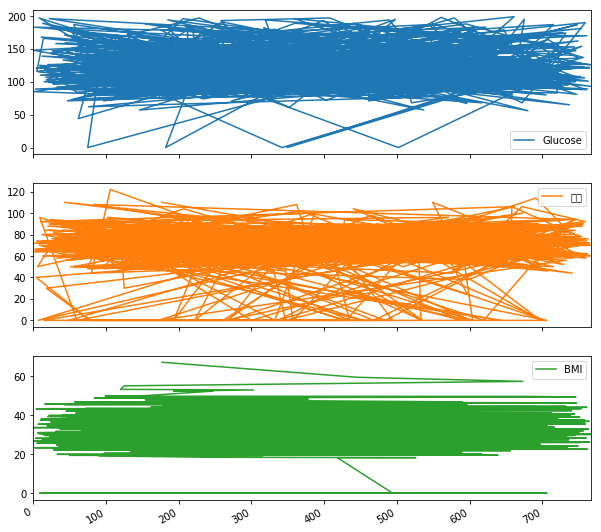

In [164]:
df3[['Glucose', '혈압', 'BMI']].plot(subplots=True, figsize=(10,10))

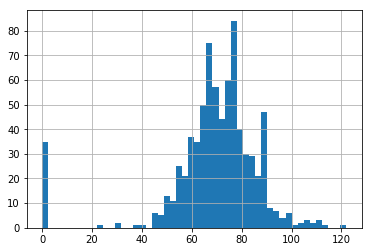

In [153]:
df3['혈압'].hist(bins=50)

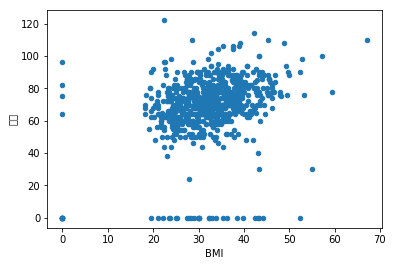

In [165]:
df3.plot.scatter(x='BMI', y='혈압')

### `apply()` method
used to apply a function along with an axis of the DataFrame


In [139]:
df3['Status'] = df3['Outcome'].apply(lambda x: ('No', 'Yes')[x])
df3.head()

,임신기간,Glucose,혈압,SkinThickness,Insulin,BMI,DPF,나이,Outcome,Status
0,6,148.000000,72,35,0,33.6,0.627000,50,1,Yes
1,1,85.000000,66,29,0,26.6,0.351000,31,0,No
2,8,183.000000,64,0,0,23.3,0.469991,32,1,Yes
3,1,89.000000,66,23,94,28.1,0.469991,21,0,No
4,0,120.929504,40,35,168,43.1,0.469991,33,1,Yes


In [141]:
def classify(bmi):
    if bmi < 18.5: return '저체중'
    if bmi < 23.0: return '정상'
    if bmi < 25.0: return '과체중'
    return '비만'

df3['비만도'] = df3['BMI'].apply(classify)
df3.head()

,임신기간,Glucose,혈압,SkinThickness,Insulin,BMI,DPF,나이,Outcome,Status,비만도
0,6,148.000000,72,35,0,33.6,0.627000,50,1,Yes,비만
1,1,85.000000,66,29,0,26.6,0.351000,31,0,No,비만
2,8,183.000000,64,0,0,23.3,0.469991,32,1,Yes,과체중
3,1,89.000000,66,23,94,28.1,0.469991,21,0,No,비만
4,0,120.929504,40,35,168,43.1,0.469991,33,1,Yes,비만


In [149]:
df3['비만도'].value_counts()

비만     651
과체중     56
정상      46
저체중     15
Name: 비만도, dtype: int64

### sorting

In [148]:
df3.sort_values('BMI', inplace=True, na_position='first')
df3.head(15)

,임신기간,Glucose,혈압,SkinThickness,Insulin,BMI,DPF,나이,Outcome,Status,비만도
145,0,102.0,75,23,0,0.0,0.572,21,0,No,저체중
706,10,115.0,0,0,0,0.0,0.261,30,1,Yes,저체중
522,6,114.0,0,0,0,0.0,0.189,26,0,No,저체중
49,7,105.0,0,0,0,0.0,0.305,24,0,No,저체중
371,0,118.0,64,23,89,0.0,1.731,21,0,No,저체중
684,5,136.0,82,0,0,0.0,0.640,69,0,No,저체중
60,2,84.0,0,0,0,0.0,0.304,21,0,No,저체중
9,8,125.0,96,0,0,0.0,0.232,54,1,Yes,저체중
426,0,94.0,0,0,0,0.0,0.256,25,0,No,저체중
81,2,74.0,0,0,0,0.0,0.102,22,0,No,저체중


## DataFrame 합치기: `concat`, `merge`, `join`
참고: https://yganalyst.github.io/data_handling/Pd_12/
